## Exploring the White Wine Dataset

- Which phsyiochemical property contributes most to high quality wine? Least?
- What is the ideal numeric value of that property that will generate the highest quality wine? 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from pandas import DataFrame as df

In [2]:
#Read in csv file
white = pd.read_csv("White_Analysis/winequality_white.csv", sep=';', encoding='UTF8') 
# Drop the null columns where all values are null
white = white.dropna(axis='columns', how='all')
# Drop the null rows
white.dropna()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
metadata = white.describe()
metadata.round()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbc7380bd0>,
      dtype=object)

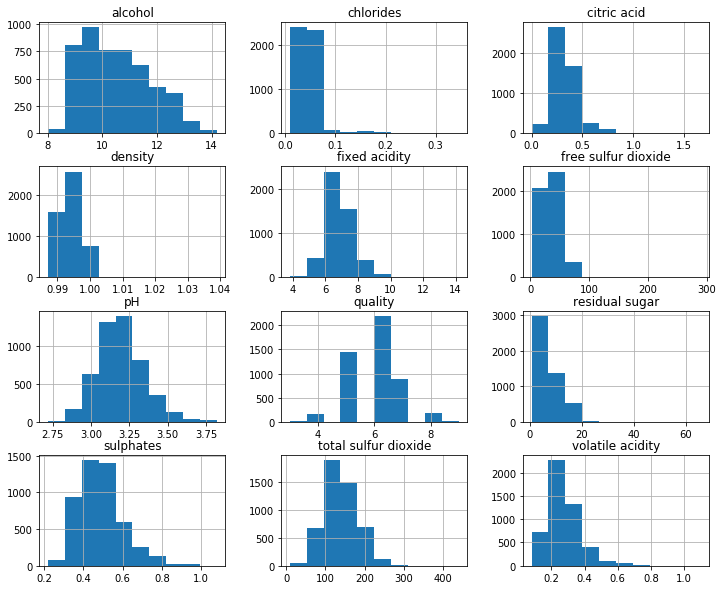

In [7]:
#Examining the distribution of each property
#PH level seems to be the most normally distributed
#Chlorides, Free of Sulfur dioxide and residual sugar appear to be the least normally distributed
white.hist(figsize=(12,10))

In [6]:
#Explore white wine quality scores (scale of 1-10)
quality_score_summary = white["quality"].value_counts()
quality_score_summary.sort_index(ascending=True)

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

Removing Outliers through IQR's

In [9]:
def remove_outlier(col_name,w_df):
    std = w_df[col_name].std()
    mean = w_df[col_name].mean()

    no_outlier_white = w_df[(w_df[col_name] > (mean - 3*std)) & (w_df[col_name] < (mean + 3*std))]
    return no_outlier_white



In [10]:
#df is the white dataset with outliers removed for all columns
w_df = white
for i in list(white.columns):
    print (i)
    w_df = remove_outlier(i,w_df)
    
w_df.round(2)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.04,24.0,92.0,0.99,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.05,57.0,168.0,0.99,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.04,30.0,111.0,0.99,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.02,20.0,110.0,0.99,3.34,0.38,12.8,7


In [11]:
w_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,6.840982,0.270621,0.326695,6.415563,0.043105,34.845715,137.591407,0.993968,3.187995,0.485413,10.537077,5.915194
std,0.785104,0.085136,0.100878,4.955954,0.011508,15.399909,41.297292,0.002907,0.143240,0.105729,1.223274,0.854036
min,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,108.000000,0.991680,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,133.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,166.000000,0.996100,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.570000,0.690000,20.800000,0.105000,85.000000,260.000000,1.001960,3.630000,0.820000,14.200000,8.000000


## Multicollinearity Assesment


In [ ]:
Multicollinearity assessed through Variable Inflation Factor (VIF)

In [ ]:
# CHECK FOR MULTICOLLINEARITY with Variance Inflation Factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["Physiochemical Variables"] = df.columns

In [ ]:
#Reset Index or drop when cleaning up notebook
vif_df = vif.sort_values(by=["VIF Factor"]).round(1)
vif_df

Multicollinearity assesment through correlation + visual

In [ ]:
phys_c = df.drop("quality", axis = 1)

phys_corr = phys_c.corr()
phys_corr

In [ ]:
#Displays the the correlation ( r, not r^2 like VIF) between each independent variable to oneanother (physochemical var's, excludes quality) 
#to provide additional evidence of collinearity

import seaborn as sns 
corr = vif_df.corr()
fig = plt.subplots(figsize=(12,10))
sns.heatmap(phys_corr,square=True,annot=True,cmap='YlGnBu')
plt.title("Correlation among the predictors")

## Residuals
-Residual sugar is least correlated with the  remaining variables. Most of the variables are are highly correlated with one another, especially density.  
-Residuals appear to be normal (symetrical), but there is an outlier that can be skiewing the model.



## Multiple Regression Analysis

### Scaling Transformation with QuantileTransformer 
-Non-linear tranformation that will help balance the indpedent variables' distribution 
-Useful in the presence of outliers

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from pandas import DataFrame as df
trans = QuantileTransformer(n_quantiles=3000, output_distribution='normal')
data = trans.fit_transform(w_df)
dataset = df(w_df)

In [ ]:
#Visual confirmation that the distribution has been changed 
dataset.hist()
plt.show()

## Multiple Regression Analysis

In [ ]:
X = w_df[w_df.columns[0:11]]
y = w_df["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")
plt.title("Residual Plot")

Scaling input and target variables through the pipeline 
https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/

- Input variable scaling is accounted for
-Target scaling will be done through TransformedTargetRegressor
- Incorperate QuantileTransformer?

In [ ]:
from sklearn.preprocessing import QuantileTransformer

X = w_df[w_df.columns[0:11]]
qt = QuantileTransformer(n_quantiles=3000, random_state=42)
x_transformed = qt.fit_transform(X)





# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', QuantileTi()), ('model', LinearRegression())])
# fit pipeline
pipeline.fit(train_x, train_y)
# make predictions
yhat = pipeline.predict(test_x)

In [ ]:
data = trans.fit_transform(data)
dataset = w_df(x_transformed)
dataset.hist()
plt.show()

In [ ]:
from numpy import mean
from numpy import absolute
from numpy import loadtxt

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import QuantileTransformer

###split into inputs and outputs
# X, y = dataset[:, :-1], dataset[:, -1]

X = white[white.columns[0:11]]
y = white["quality"].values.reshape(-1, 1)


# transform input variables scales through pipeline
pipeline = Pipeline(steps=[('normalize', QuantileTransformer()), ('model', LinearRegression())])

# fit pipeline
pipeline.fit(train_x, train_y)

# make predictions
yhat = pipeline.predict(test_x)
pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', LinearRegression())])


# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())


# # evaluate model
# cv = KFold(n_splits=10, shuffle=True, random_state=1)
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # convert scores to positive
# scores = absolute(scores)

# # summarize the result
# s_mean = mean(scores)
# print('Mean MAE: %.3f' % (s_mean))

# Principle Component Analysis (PCA)

- Rerun when outliers are removed from dataset
-Re-run with different scaling

In [20]:
w_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [12]:
from sklearn.decomposition import PCA

X = w_df[w_df.columns[0:11]]
y = w_df["quality"].values.reshape(-1, 1)


pca = PCA(n_components=10)
pc = pca.fit_transform(X)

print(X.shape)
print(pc.shape)

(4469, 11)
(4469, 10)


In [37]:
pca.explained_variance_

array([1.80819291e+03, 1.39563169e+02, 1.99340895e+01, 1.01115636e+00,
       6.02754675e-01, 1.69999652e-02, 1.07089321e-02, 9.02321666e-03,
       6.12019872e-03, 9.44474526e-05])

In [40]:
#weights - 
pca.components_

array([[ 1.43547317e-03,  1.89098099e-04,  3.02215333e-04,
         5.04050477e-02,  8.79359113e-05,  2.42333030e-01,
         9.68790378e-01,  3.80687151e-05,  1.11153004e-05,
         3.72879229e-04, -1.33004394e-02],
       [ 6.96473068e-03,  1.34755900e-03, -4.42630772e-04,
        -4.61265697e-02,  1.12737153e-04, -9.68491374e-01,
         2.44571032e-01,  4.85344404e-06,  3.08795010e-04,
         3.25141251e-04, -5.57456498e-03],
       [ 1.20097777e-02,  7.25631240e-04,  7.27477968e-04,
         9.93138051e-01,  3.65620729e-04, -5.64866548e-02,
        -3.88458807e-02,  4.43846774e-04, -7.03829396e-03,
        -2.03004226e-03, -9.36898482e-02],
       [-1.04763887e-01,  1.61587798e-02, -1.69156693e-03,
         9.46443259e-02, -4.37301086e-03, -8.18885483e-03,
         1.08652838e-02, -1.17843223e-03,  9.09270737e-03,
        -1.74896756e-03,  9.89702810e-01],
       [ 9.90882550e-01, -5.30034965e-03,  3.77846165e-02,
        -2.23961208e-03, -2.64973013e-04,  6.20508850e-03,
  

In [22]:
model.coef_

array([[-6.25822003e-16,  7.03637181e-16,  1.41168109e-15,
        -1.12298210e-15,  6.01321072e-16, -2.00460828e-15,
        -1.23437557e-16,  3.92342690e-16, -7.78022198e-16,
         4.82511446e-16,  4.00000000e+00]])

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [13]:
pc_df = pd.DataFrame(pc)
pc_df = pd.concat([pc_df, w_df[['quality']]], axis = 1)
pc_df.dropna(inplace=True)

In [14]:
pcX = pc_df[pc_df.columns[0:11]]
pcy = pc_df["quality"].values.reshape(-1, 1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcX, pcy,train_size=.5, random_state=3)

In [28]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error

prediction7 = model.predict(X_test_scaled)
rounded7 = np.rint(prediction7)

MSE = mean_squared_error(y_test, rounded7)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 27.849019607843136, R2: -37.98189005102161


In [31]:
# actual = y_test
predicted = model.predict(X_test)
predicted
# comparison_df = act

array([[7.],
       [6.],
       [6.],
       ...,
       [7.],
       [6.],
       [5.]])

In [32]:
prediction7

array([[0.75],
       [0.5 ],
       [0.5 ],
       ...,
       [0.75],
       [0.5 ],
       [0.25]])

In [33]:
comparison_df = pd.DataFrame(y_test)
comparison_df["Predictions"] = prediction7
comparison_df
#rename

,0,Predictions
0,7.0,0.75
1,6.0,0.50
2,6.0,0.50
3,6.0,0.50
4,7.0,0.75
...,...,...
2035,5.0,0.25
2036,6.0,0.50
2037,7.0,0.75
2038,6.0,0.50


# Ordinal Regressions 
- I selected orginal regression because the target variable is ordinal, not continuous. 

- After trying three types of ordinal regressions (logistic, OrdinalRidge and LAD), logistic seems to be the strongest

- Outliers weren't removed for these analysis
- Used MinMaxScaling, but other scaling types may strengthen the model

** Double check negative values

Threshold-based model (LogisticIT)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
import mord as m
classifier = m.LogisticIT()

In [ ]:
classifier.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Regression based model

-Ordinal Ridge

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
import mord as m
classifier = m.OrdinalRidge()
classifier.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Regression based model

- LAD :
The Least Absolute Deviation model instead minimizes the absolute value of the residuals, i.e.MAE regression

This provides a more robust solution when outliers are present, but it does have some undesirable properties, most notably that there are some situations where there is no unique solution, and in fact an infinite number of different regression lines are possible.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
import mord as m
classifier = m.LAD()
classifier.fit(X_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")